In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('retail_sales_dataset.csv')

In [11]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Year                0
Month               0
dtype: int64


In [5]:
summary_stats = df.describe()
print(summary_stats)

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


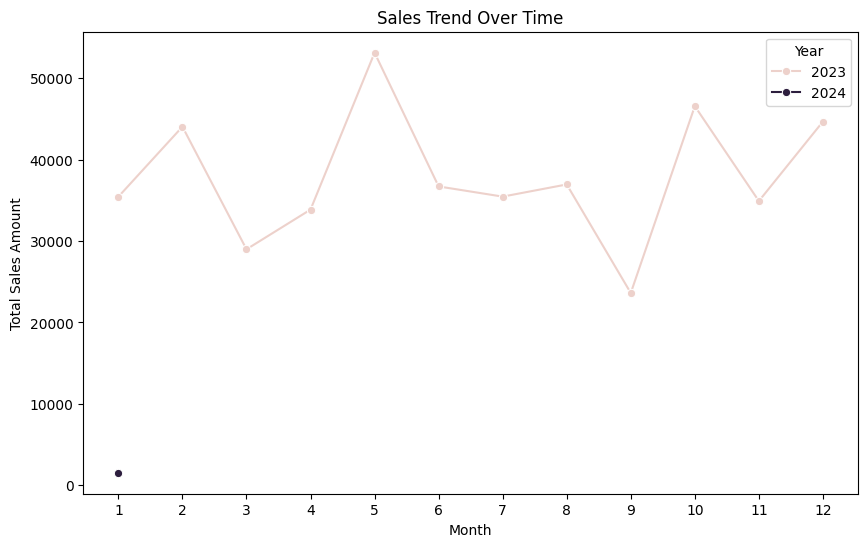

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

sales_over_time = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_over_time, x='Month', y='Total Amount', hue='Year', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(np.arange(1, 13))
plt.legend(title='Year')
plt.show()

In [7]:
customer_demographics = df.groupby('Gender').agg({'Customer ID': 'nunique', 'Age': ['min', 'max', 'mean']})
print(customer_demographics)
product_analysis = df.groupby('Product Category').agg({'Quantity': 'sum', 'Total Amount': 'sum'}).sort_values(by='Total Amount', ascending=False)
print(product_analysis)

       Customer ID Age               
           nunique min max       mean
Gender                               
Female         510  18  64  41.356863
Male           490  18  64  41.428571
                  Quantity  Total Amount
Product Category                        
Electronics            849        156905
Clothing               894        155580
Beauty                 771        143515


<ipython-input-8-eaf609daa2ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_analysis, x=product_analysis.index, y='Total Amount', palette='viridis')


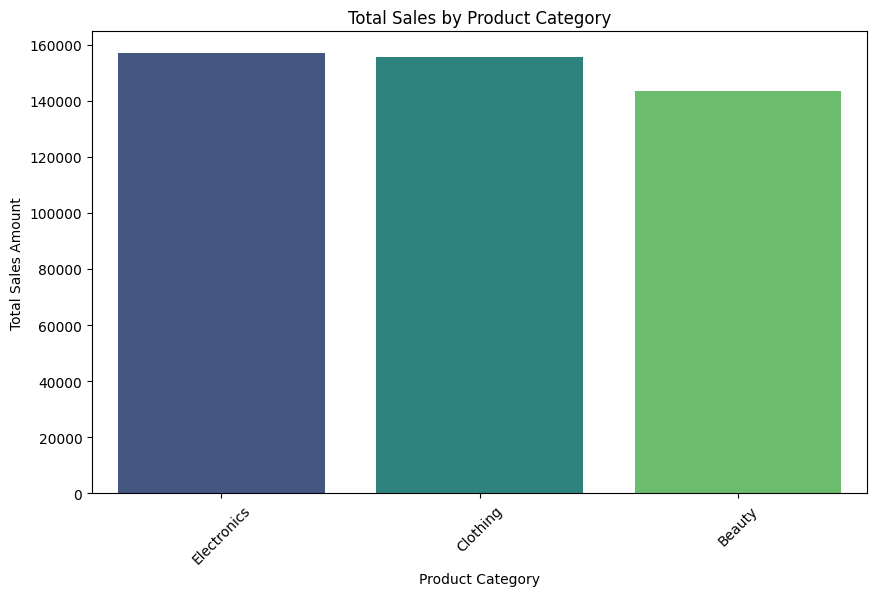

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=product_analysis, x=product_analysis.index, y='Total Amount', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-28f58a9d9069>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


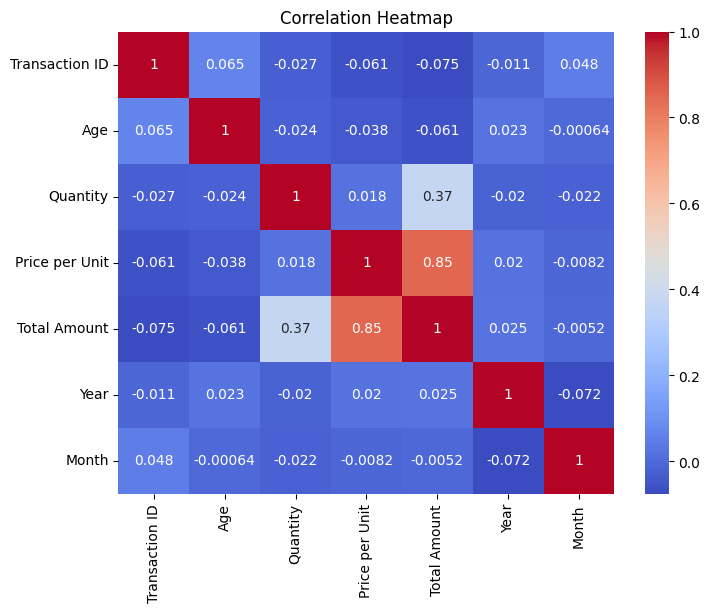

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()